In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk

In [13]:
df1 = pd.read_csv('spam.csv',encoding='latin-1')
df1 = df1.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df1 = df1.rename(columns={"v1":"label", "v2":"sms"})
df1.head()


,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
import pandas as pd

# 1. Load both CSV files
df2 = pd.read_csv("combined_dataset.csv")


df2 = df2.rename(columns={"target":"label", "text":"sms"})
df2.head()




,label,sms
0,spam,Congratulations! You've been selected for a lu...
1,spam,URGENT: Your account has been compromised. Cli...
2,spam,You've won a free iPhone! Claim your prize by ...
3,spam,Act now and receive a 50% discount on all purc...
4,spam,Important notice: Your subscription will expir...


In [15]:
df_sms = pd.concat([df1, df2], ignore_index=True)

In [16]:
df_sms.label.value_counts()

label
ham     13380
spam     3153
Name: count, dtype: int64

In [17]:
df_sms.describe()

,label,sms
count,16533,16533
unique,2,10727
top,ham,"Sorry, I'll call later"
freq,13380,60


In [18]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()



,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
max_len = df_sms["sms"].astype(str).str.len().max()
print("Highest message length (chars):", max_len)

Highest message length (chars): 31851


In [20]:
for i in range(40):
  

  idx = df_sms["sms"].astype(str).str.len().idxmax()
  longest_message = df_sms.loc[idx, "sms"]
  df_sms.drop(index=idx, inplace=True)

print("Index of longest message:", idx)
print("Length:", len(longest_message))
print("Message:\n", longest_message)



Index of longest message: 9337
Length: 8010
Message:
 uptick sharess mnei - the best small cap stock in 20 o 5 just keep reading the profile and the news of this company and you will see for yourseif this stock is undiscovered stock gem - just starting to trade miilennium nationa | events , inc . - symbol : mnei milienniums current roster of event sponsors inciudes such names as : wm wrigiey , american express , office depot , verizon , italian rose , twa , power sports , pizza hut , coca - cola , samuel adams , ciear channel communications , viacom , infinity broadcasting , budweiser , cox broadcasting , nbc local affiliates , brown foreman ( jack danieis ) , southern wine spirits , viking ovens and bergwater vineyards . and just read the friday news . . . read the entire news below news . . miliennium nationa | events enters negotiations to acquire match point , inc . owner of the miliennium international tennis tournament yes you read it right - this is serious company with some ser

<Axes: ylabel='Frequency'>

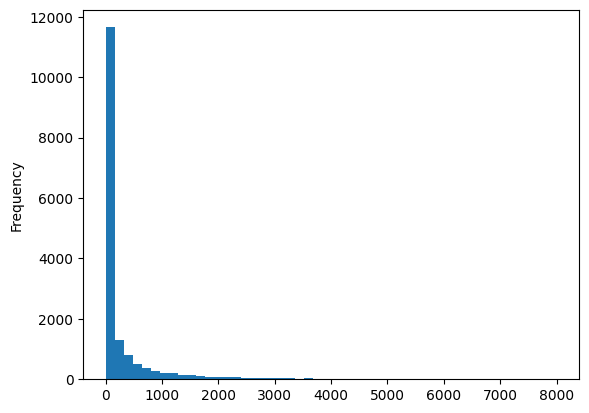

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_sms['length'].plot(bins=50, kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

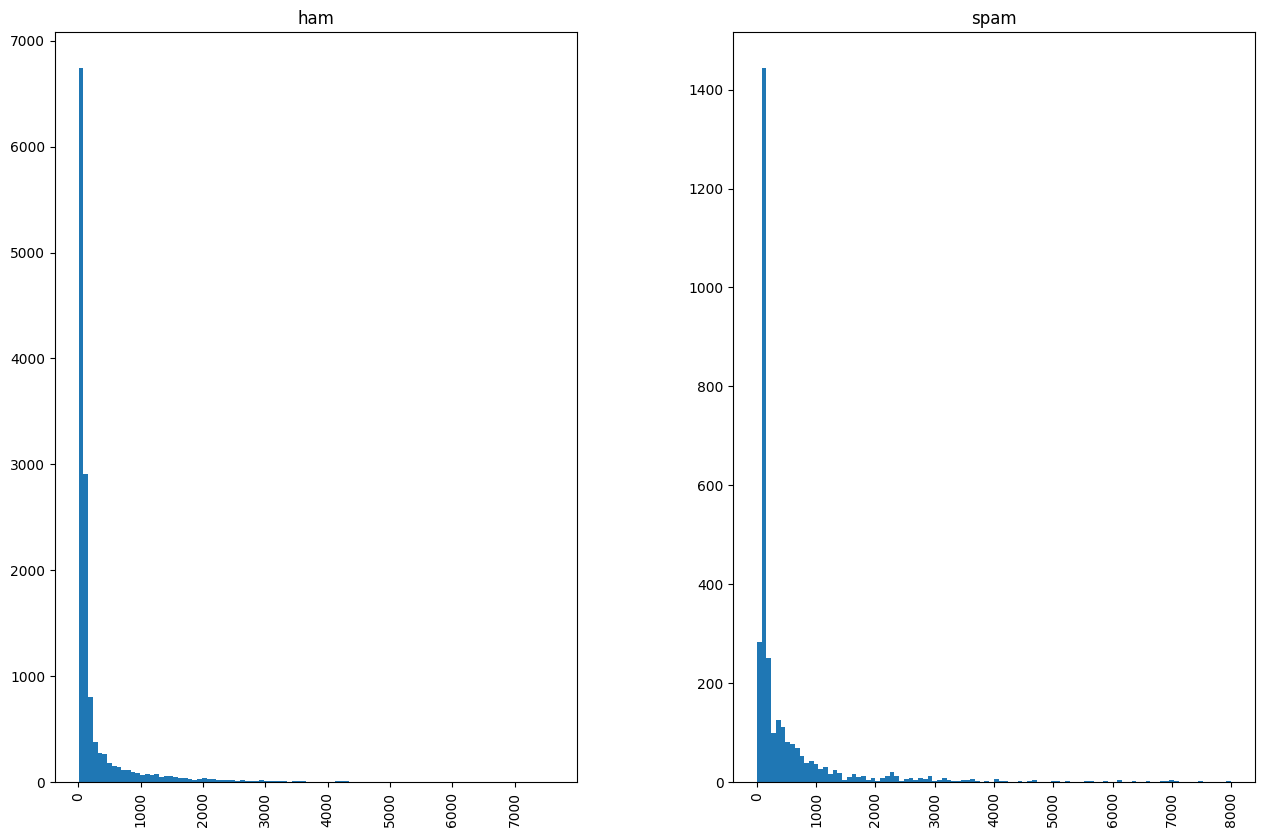

In [22]:
df_sms.hist(column='length', by='label', bins=100,figsize=(15,10))

In [23]:

df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
df_sms.dropna(subset=['label'], inplace=True)
df_sms.loc[:,'label'] = df_sms.label.astype(int)
print(df_sms.shape)
df_sms.head()

(16493, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [25]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))

sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

In [26]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

In [27]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(documents)
count_vector.get_feature_names_out()

array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

In [29]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [30]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names_out())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'],
                                                    df_sms['label'], test_size=0.20,
                                                    random_state=1)

# Explicitly convert y_train and y_test to integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [32]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix.
testing_data = count_vector.transform(X_test)

In [33]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
predictions = naive_bayes.predict(testing_data)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9699909063352531
Precision score: 0.9024
Recall score: 0.9368770764119602
F1 score: 0.9193154034229829


In [35]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(naive_bayes, training_data,y_train, cv=cv, scoring='f1')

print("F1 scores:", scores)
print("Mean F1:", scores.mean())
print("Std:", scores.std())


F1 scores: [0.92411143 0.90291262 0.94695481 0.91806515 0.90820312]
Mean F1: 0.9200494288091307
Std: 0.015351495146258366


In [36]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    naive_bayes, training_data, y_train, cv=5, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10)
)

print("Final train F1:", train_scores.mean(axis=1)[-1])
print("Final test F1:", test_scores.mean(axis=1)[-1])


Final train F1: 0.9579058773598197
Final test F1: 0.9189753897605482


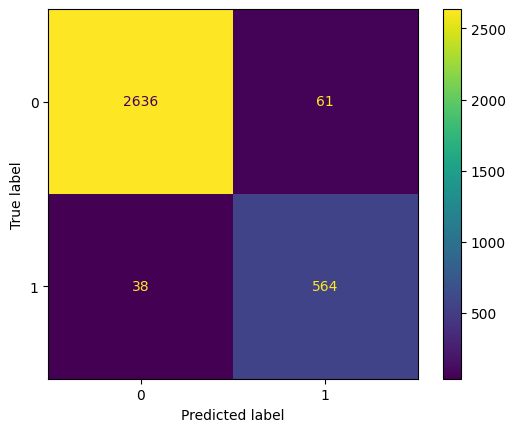

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(naive_bayes, testing_data, y_test)

### Test Case: Predicting new messages

In [38]:
test_messages = [
    "free, you can get this for a wild price of $10 ",
    "I don't know what he does for living but i can clearly say that he's a fraud"
]

# Transform the new messages using the fitted CountVectorizer
test_messages_transformed = count_vector.transform(test_messages)

# Predict the labels for the new messages
predictions_new = naive_bayes.predict(test_messages_transformed)

# Map numerical predictions back to 'ham' and 'spam' for better understanding
prediction_labels = ['ham' if p == 0 else 'spam' for p in predictions_new]

for i, message in enumerate(test_messages):
    print(f"Message: '{message}'\nPredicted as: {prediction_labels[i]}\n")

Message: 'free, you can get this for a wild price of $10 '
Predicted as: spam

Message: 'I don't know what he does for living but i can clearly say that he's a fraud'
Predicted as: ham

